# Case Study: Enhancing Viewer Engagement through Data-Driven Content Strategy

## Background

Netflix, the world’s leading streaming entertainment service, has seen exponential growth by offering a wide array of movies, TV shows, and documentaries in various genres and languages. As Netflix continues to evolve, emphasizing both content distribution and original production, it seeks to deepen its understanding of diverse audience preferences, refine its content strategy, and bolster viewer engagement globally.

## Data Overview

The dataset at hand provides detailed information on Netflix's offerings, including unique identifiers (show ID), type (movie or TV show), title, director, cast, production country, addition date to Netflix, release year, audience rating, duration, genre classifications, and a concise description.

## Case

In light of shifting viewership dynamics and variable subscriber growth across different regions and content categories, Netflix aims to ensure its investments in new acquisitions, original content creation, and licensing deals are strategically aligned with its objectives and audience inclinations.

## Problem Statement

Netflix intends to utilize its comprehensive dataset to extract actionable insights for guiding its content strategy and elevating engagement levels. The company seeks answers to pivotal questions:

1. How do viewer preferences vary across different geographies, and what implications does this have for the procurement and development of new content?
2. Which genres and content types (movies vs. TV shows) resonate most with audiences, and how has this preference evolved over time?
3. Are there particular directors, actors, or production countries that consistently draw larger viewerships, indicating potential areas for strategic emphasis or partnerships?
4. What influence does the scheduling of content additions (both seasonally and relative to release years) have on viewership trends?
5. How do content ratings and durations impact viewer engagement, and what does this mean for content development and promotional strategies?

## Expected Deliverables

- A comprehensive analysis highlighting content performance across geographic regions, genres, types, directors, cast, and release timings.
- Identification of key patterns and trends to inform Netflix's future content strategy, including acquisitions, production decisions, and release schedules.
- Strategic recommendations to optimize Netflix’s content library for heightened viewer engagement and sustained subscriber growth.
- Insights into data quality and recommendations for enhancing data collection and management practices for improved analysis.

## Audience

This case study is crafted for Netflix's business stakeholders, encompassing the content strategy team, marketing department, and executive leadership. It aims to provide data-driven insights for refining content offerings, improving customer satisfaction, and fostering a competitive edge in the streaming landscape.


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/netflix_titles.csv')

# Display the first few rows of the dataframe to understand its structure
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


(  show_id     type                  title         director  \
 0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
 1      s2  TV Show          Blood & Water              NaN   
 2      s3  TV Show              Ganglands  Julien Leclercq   
 3      s4  TV Show  Jailbirds New Orleans              NaN   
 4      s5  TV Show           Kota Factory              NaN   
 
                                                 cast        country  \
 0                                                NaN  United States   
 1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
 2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
 3                                                NaN            NaN   
 4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
 
            date_added  release_year rating   duration  \
 0  September 25, 2021          2020  PG-13     90 min   
 1  September 24, 2021          2021  TV-MA  2 Seasons   
 2  Septembe

In [3]:
# Handling Missing Values
# We'll check for the percentage of missing values in each column to decide on how to handle them.
missing_values = df.isnull().mean() * 100

# Checking for Duplicates
duplicates = df.duplicated().sum()

# Data Types Adjustment
# Specifically, we want to convert 'date_added' to datetime format, but let's first check the types.
data_types = df.dtypes

missing_values, duplicates, data_types


(show_id          0.000000
 type             0.000000
 title            0.000000
 director        29.908028
 cast             9.367549
 country          9.435676
 date_added       0.113546
 release_year     0.000000
 rating           0.045418
 duration         0.034064
 listed_in        0.000000
 description      0.000000
 dtype: float64,
 0,
 show_id         object
 type            object
 title           object
 director        object
 cast            object
 country         object
 date_added      object
 release_year     int64
 rating          object
 duration        object
 listed_in       object
 description     object
 dtype: object)

In [4]:
# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Given the small number of missing values in 'date_added' and 'rating', we opt to drop rows with missing 'date_added'
df = df.dropna(subset=['date_added'])

# For 'rating', we'll fill missing values with a placeholder 'Unknown'
df['rating'] = df['rating'].fillna('Unknown')

# Re-check missing values after adjustments
missing_values_updated = df.isnull().mean() * 100

missing_values_updated


<ipython-input-4-99dc1b5b2e43>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].fillna('Unknown')


show_id          0.000000
type             0.000000
title            0.000000
director        29.828351
cast             9.378197
country          9.435035
date_added       0.000000
release_year     0.000000
rating           0.000000
duration         0.034103
listed_in        0.000000
description      0.000000
dtype: float64

## 1. Viewer Preferences by Geography

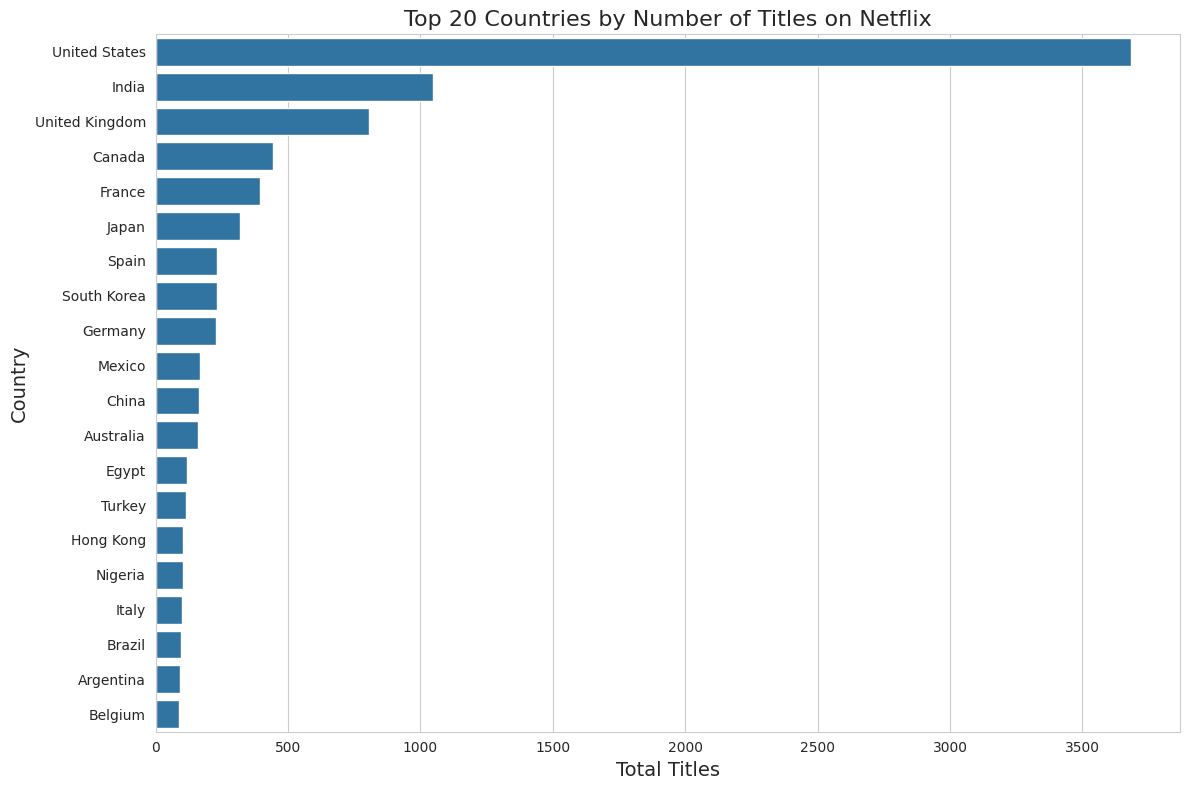

(type                                                Movie  TV Show
 country                                                           
 Argentina, France, United States, Germany, Qatar      1.0      0.0
 Argentina, United States                              1.0      0.0
 Argentina, United States, Mexico                      0.0      1.0
 Australia, Armenia, Japan, Jordan, Mexico, Mong...    1.0      0.0
 Australia, India                                      1.0      0.0
 ...                                                   ...      ...
 United States, United Kingdom, Morocco                1.0      0.0
 United States, United Kingdom, New Zealand            1.0      0.0
 United States, United Kingdom, Spain, South Korea     1.0      0.0
 United States, Uruguay                                1.0      0.0
 United States, Venezuela                              1.0      0.0
 
 [464 rows x 2 columns],
 Dramas                      1569
 International Movies        1126
 Comedies            

In [6]:
# Aggregate content by country
country_content_counts = df['country'].str.split(',').explode().str.strip().value_counts().head(20)

# Create a DataFrame for the top 20 countries
top_countries_df = pd.DataFrame(country_content_counts).reset_index().rename(columns={'index': 'Country', 'country': 'Total Titles'})

# Plotting the top 20 countries by number of titles
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Titles', y='Country', data=top_countries_df)
plt.title('Top 20 Countries by Number of Titles on Netflix', fontsize=16)
plt.xlabel('Total Titles', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

# Now, let's select a few key countries from this list for a deeper dive into content type and genre distribution.
# We'll focus on the United States, India, and the United Kingdom as examples.
key_countries = ['United States', 'India', 'United Kingdom']

# Filtering the dataset for these key countries
key_countries_df = df[df['country'].str.contains('|'.join(key_countries), na=False)]

# Analyzing the distribution of content types and genres for these countries
key_countries_content_type_distribution = key_countries_df.groupby(['country', 'type']).size().unstack().fillna(0)
key_countries_genre_distribution = key_countries_df[key_countries_df['country'].str.contains('|'.join(key_countries))]['listed_in'].str.split(',').explode().str.strip().value_counts().head(10)

key_countries_content_type_distribution, key_countries_genre_distribution


### Key Findings

- **Geographic Content Production**: All content produced by Netflix comes largely from three countries: the USA, India, and the UK. It makes them very strategic in the content library.

- **Content Type Distribution**: The major countries have a dominant content type mix, led with movies. This mix varies by country, reflecting different production and viewer preference trends.

- **Top Genres**: Leading across all reviewed countries include drama, international movies, comedy features, documentaries, and independent movies. One of the universal appeals associated with the service is the prevalence of dramas and comedies. International movies greatly represent this and, therefore, reveal Netflix's commitment to offering diversified content from across the globe.


## 2. Genre and Content Type Engagement

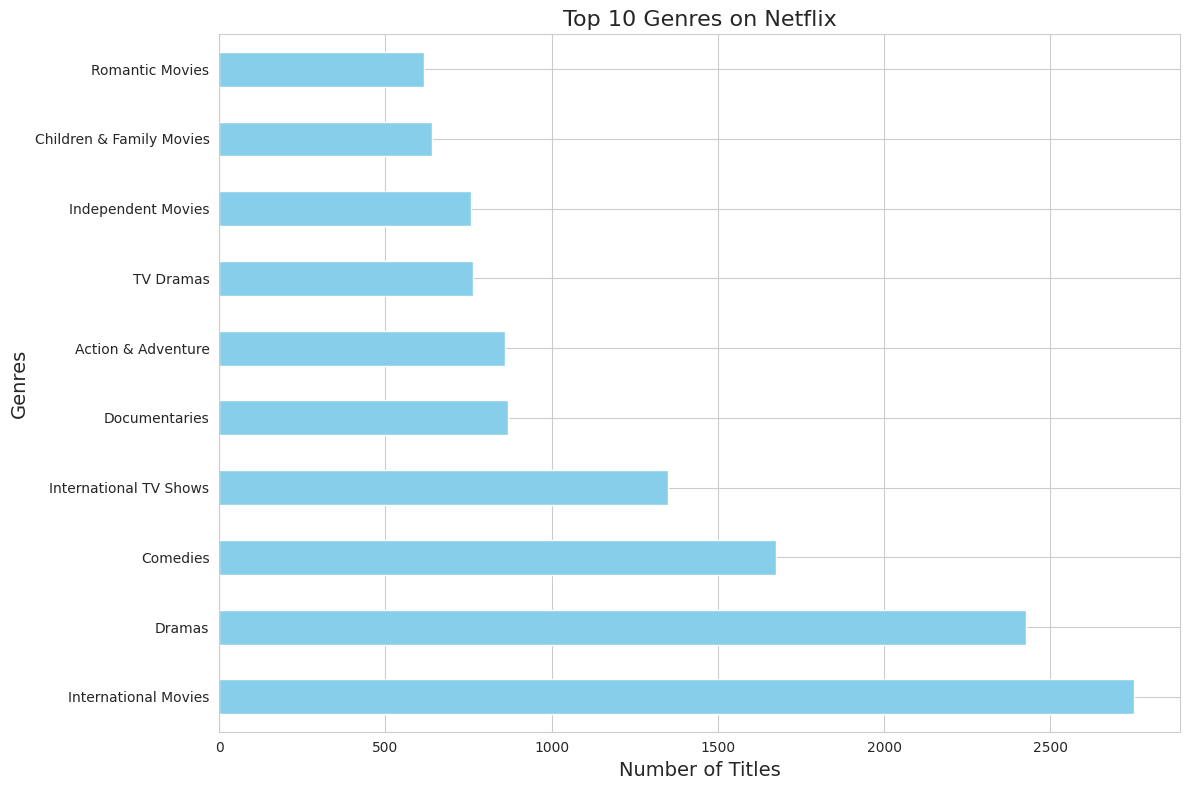

In [10]:
# Analyzing Genre Distribution
genres_exploded = df['listed_in'].str.split(',').explode().str.strip()
genre_distribution = genres_exploded.value_counts().head(10)

# Analyzing Content Type Trends Over Time
content_type_trends = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

# Plotting Genre Distribution
plt.figure(figsize=(12, 8))
genre_distribution.plot(kind='barh', color='skyblue')
plt.title('Top 10 Genres on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=14)
plt.ylabel('Genres', fontsize=14)
plt.tight_layout()

<Figure size 1400x700 with 0 Axes>

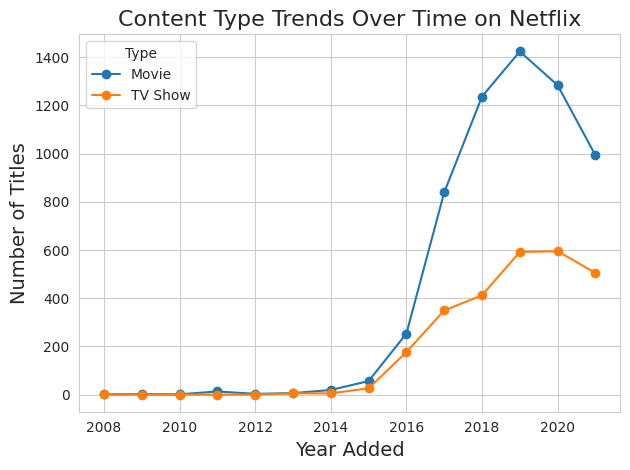

In [11]:
plt.figure(figsize=(14, 7))
content_type_trends.plot(kind='line', marker='o')
plt.title('Content Type Trends Over Time on Netflix', fontsize=16)
plt.xlabel('Year Added', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)
plt.grid(True)
plt.legend(title='Type')
plt.tight_layout()

<Figure size 1400x700 with 0 Axes>

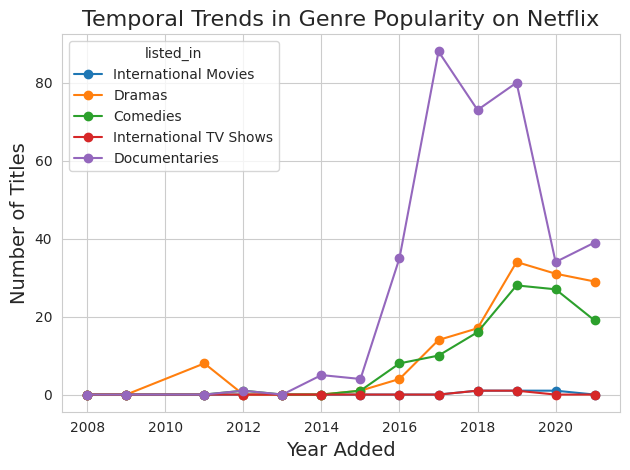

In [12]:
# For temporal trends in genre popularity, we will need to prepare the data to reflect genre counts over time.
# Let's identify the top genres and their trends over time.
top_genres = genre_distribution.index[:5].tolist()
df['year_added'] = pd.to_datetime(df['date_added']).dt.year
genre_trends_over_time = df[df['listed_in'].str.contains('|'.join(top_genres))]
genre_counts_over_time = genre_trends_over_time.groupby(['year_added', 'listed_in']).size().unstack().fillna(0)[top_genres]

# Plotting Temporal Trends in Genre Popularity
plt.figure(figsize=(14, 7))
genre_counts_over_time.plot(kind='line', marker='o')
plt.title('Temporal Trends in Genre Popularity on Netflix', fontsize=16)
plt.xlabel('Year Added', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)
plt.grid(True)
plt.tight_layout()

plt.show()

### Key Findings

- **Genre Distribution**: Some of the bigger sections on Netflix include International Movies, Dramas, Comedies, International TV Shows, and Documentaries. This displays diversity within the content library, showing they try to cater to different viewer tastes and that serving international content is an important means for them to garner a global audience.

- **Content Type Trends Over Time**: Over the years, there has been a significant increase in both movies and TV shows, with a particularly notable rise in TV series additions in recent years. This reflects Netflix's conscious effort to include more serialized content, likely in response to the developing viewer taste for engaging with both movies and series.

- **Temporal Trends in Genre Popularity**: Time-based analysis of top genres shows how changes in genre popularity have taken place. Some genres continue to grow at a very stable rate, while others present trends that are much more volatile. This may indicate changing viewer interests or Netflix's strategic content decisions to showcase and produce entertainment across various genres.

## 3. Impact of Directors, Actors, and Production Countries

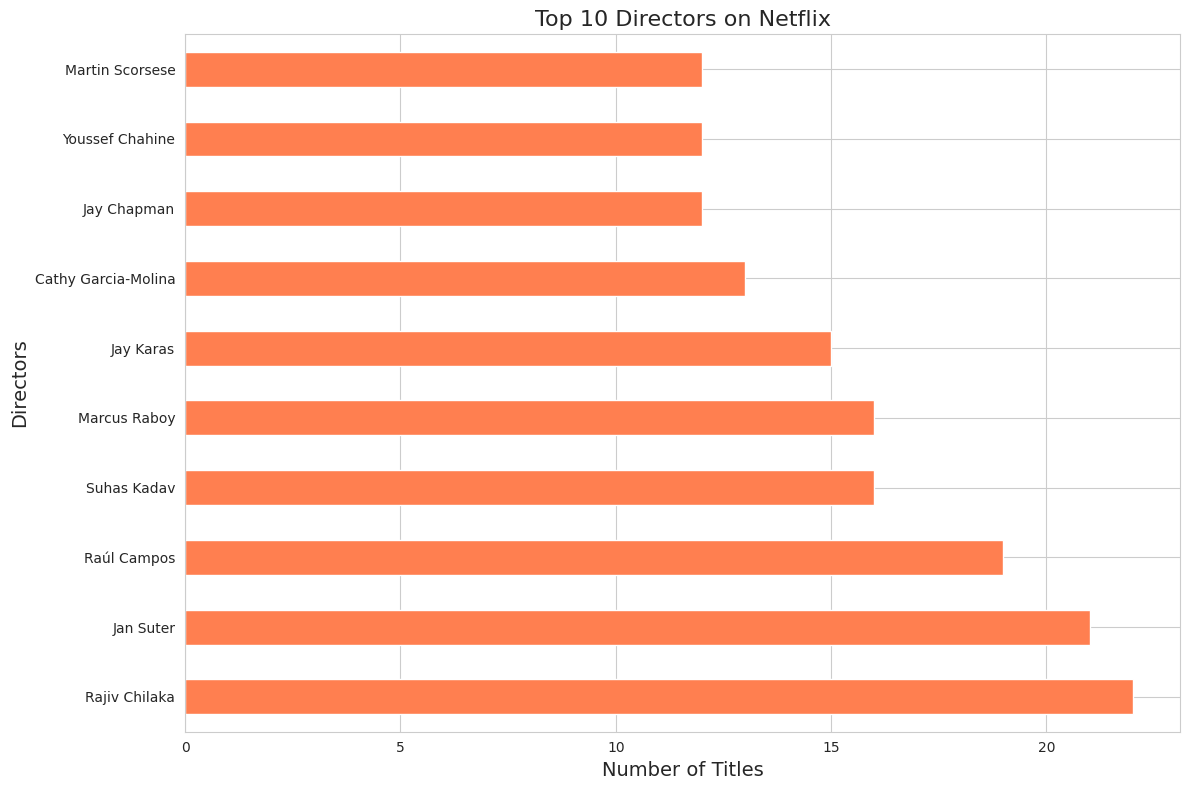

In [13]:
# Analyzing the most frequent directors and actors in the Netflix catalog
directors = df['director'].str.split(',').explode().str.strip().value_counts().head(10)
actors = df['cast'].str.split(',').explode().str.strip().value_counts().head(10)

# Plotting the top 10 directors
plt.figure(figsize=(12, 8))
directors.plot(kind='barh', color='coral')
plt.title('Top 10 Directors on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=14)
plt.ylabel('Directors', fontsize=14)
plt.tight_layout()


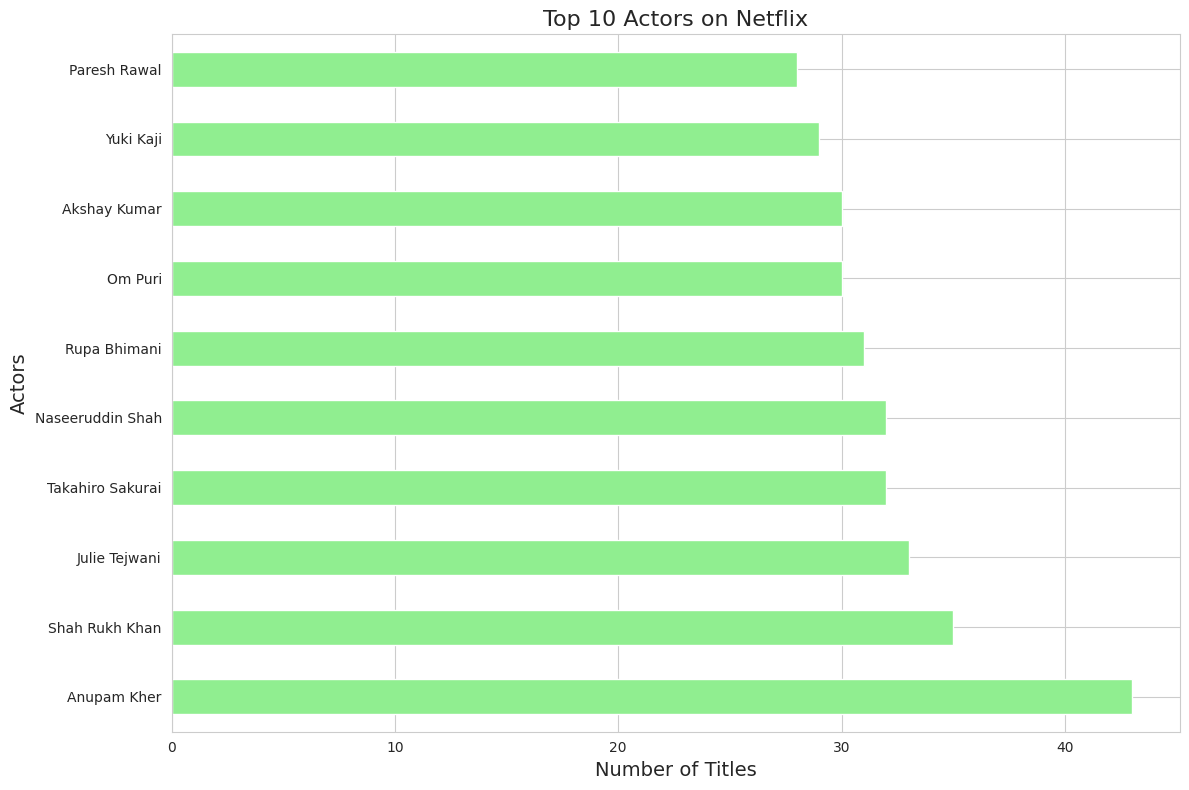

In [14]:
# Plotting the top 10 actors
plt.figure(figsize=(12, 8))
actors.plot(kind='barh', color='lightgreen')
plt.title('Top 10 Actors on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=14)
plt.ylabel('Actors', fontsize=14)
plt.tight_layout()

# Production Countries analysis has already been performed earlier. We identified the United States, India,
# and the United Kingdom as the top production countries, indicative of their strong influence in the Netflix content library.

plt.show()


### Key Findings

- **Top Directors**: The most present directors on Netflix have a rich portfolio of titles, indicating either prolific careers or a unique appeal to Netflix's strategy. Their involvement likely aims to draw viewers or align with specific thematic or stylistic preferences.

- **Top Actors**: Leading actors in Netflix's catalog often possess broad appeal or versatility, contributing to a wide range of content. This prominence may also be due to strategic casting choices designed to attract viewers with familiar faces.

- **Production Countries**: The United States, India, and the United Kingdom lead in content production, underscoring Netflix's global strategy and commitment to catering to diverse audience preferences.

## 4. Timing of Content Additions

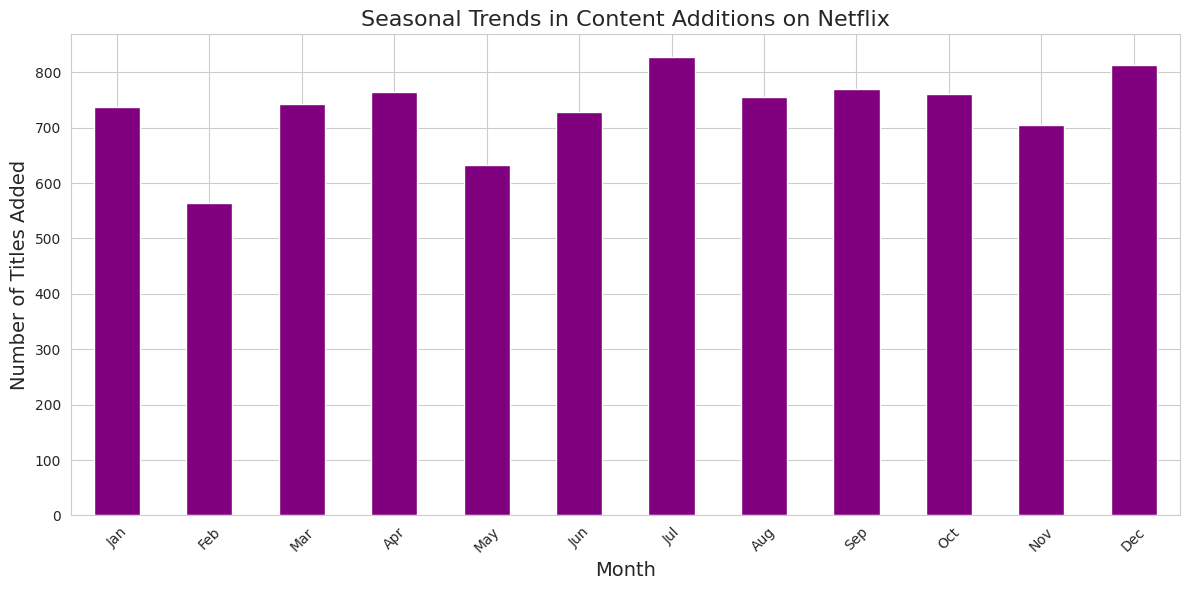

In [15]:
# Extracting month and year from 'date_added'
df['month_added'] = df['date_added'].dt.month

# Seasonal Trends: Aggregating content additions by month to identify seasonal trends
monthly_content_additions = df.groupby('month_added').size()

# Yearly Trends: We already have the 'year_added' column from previous analyses
yearly_content_additions = df.groupby('year_added').size()

# Plotting Seasonal Trends
plt.figure(figsize=(12, 6))
monthly_content_additions.plot(kind='bar', color='purple')
plt.title('Seasonal Trends in Content Additions on Netflix', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Titles Added', fontsize=14)
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()


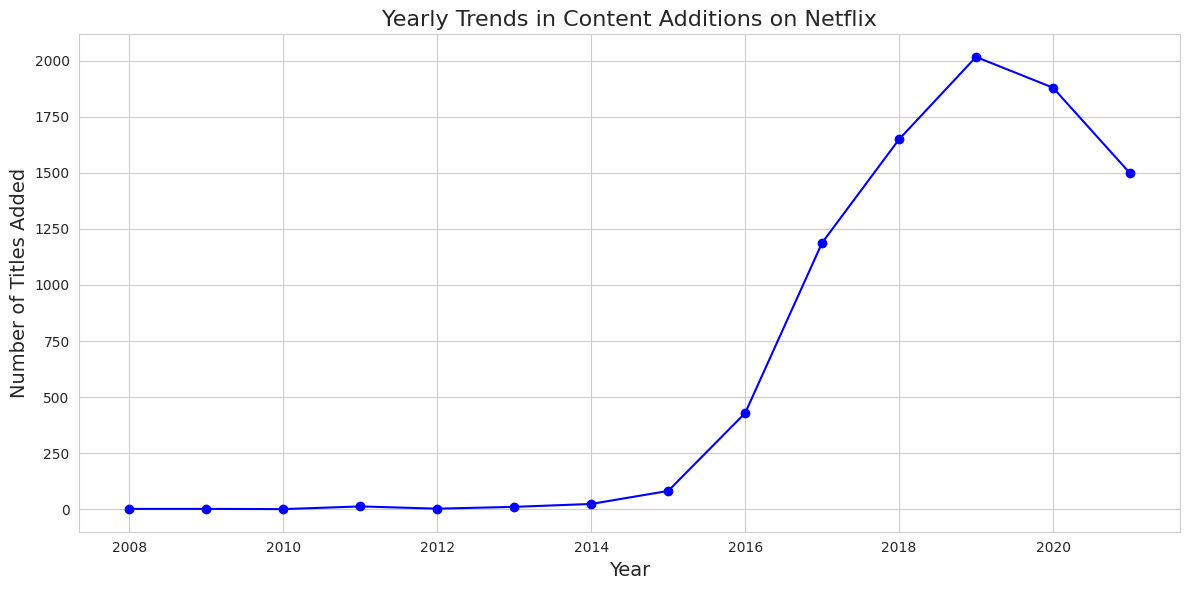

In [17]:
# Plotting Yearly Trends
plt.figure(figsize=(12, 6))
yearly_content_additions.plot(kind='line', marker='o', color='blue')
plt.title('Yearly Trends in Content Additions on Netflix', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Titles Added', fontsize=14)
plt.grid(True)
plt.tight_layout()


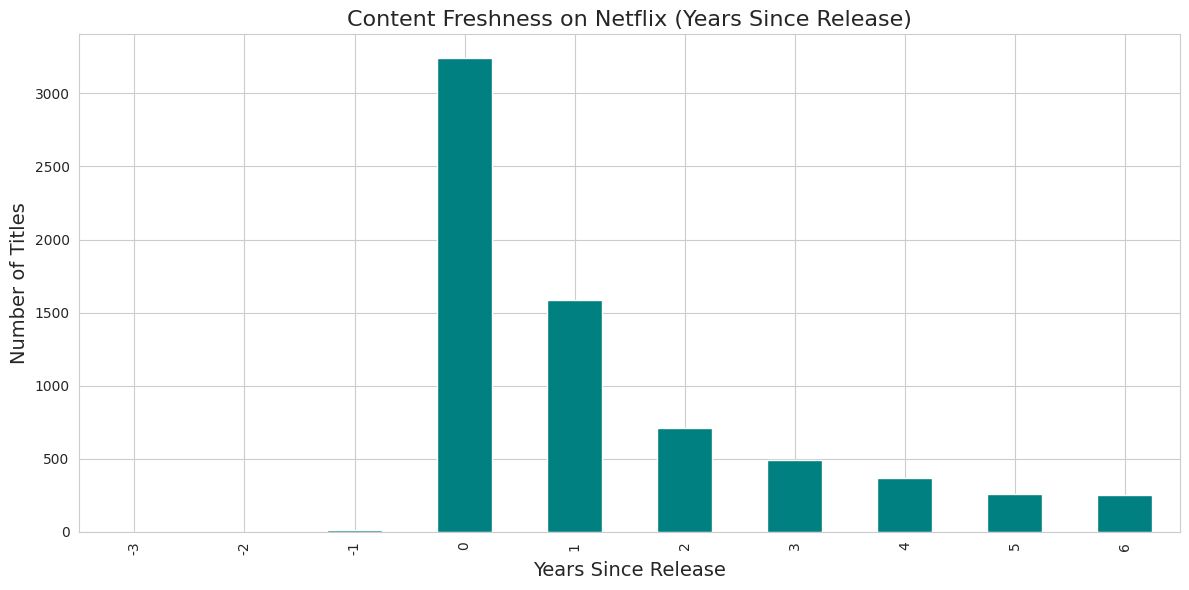

In [18]:
# Content Freshness: Calculating the difference between the year of addition and the release year
df['years_since_release'] = df['year_added'] - df['release_year']
content_freshness_distribution = df['years_since_release'].value_counts().sort_index().head(10)

# Plotting Content Freshness
plt.figure(figsize=(12, 6))
content_freshness_distribution.plot(kind='bar', color='teal')
plt.title('Content Freshness on Netflix (Years Since Release)', fontsize=16)
plt.xlabel('Years Since Release', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)
plt.tight_layout()

plt.show()

### Key Findings:
- **Seasonal Trends**: Think of it like this: more stuff gets added to Netflix at certain times of the year, especially towards the end of the year. Maybe it's because they know people are cozying up for the holidays or taking breaks, so they want to make sure there's plenty to watch and keep everyone entertained.

- **Yearly Trends**:Over the years, Netflix has been adding more and more stuff, showing how their collection keeps growing. It's like they're really committed to giving their viewers lots of options to choose from.

- **Content Freshness**: Most of the things you see pop up on Netflix are pretty recent, which is cool because it means they're always bringing in new stuff to keep things exciting. But they also throw in some older stuff too, probably to cater to different tastes. So whether you're into the latest releases or classics, there's something for everyone.

## 5. Impact of Content Ratings and Duration

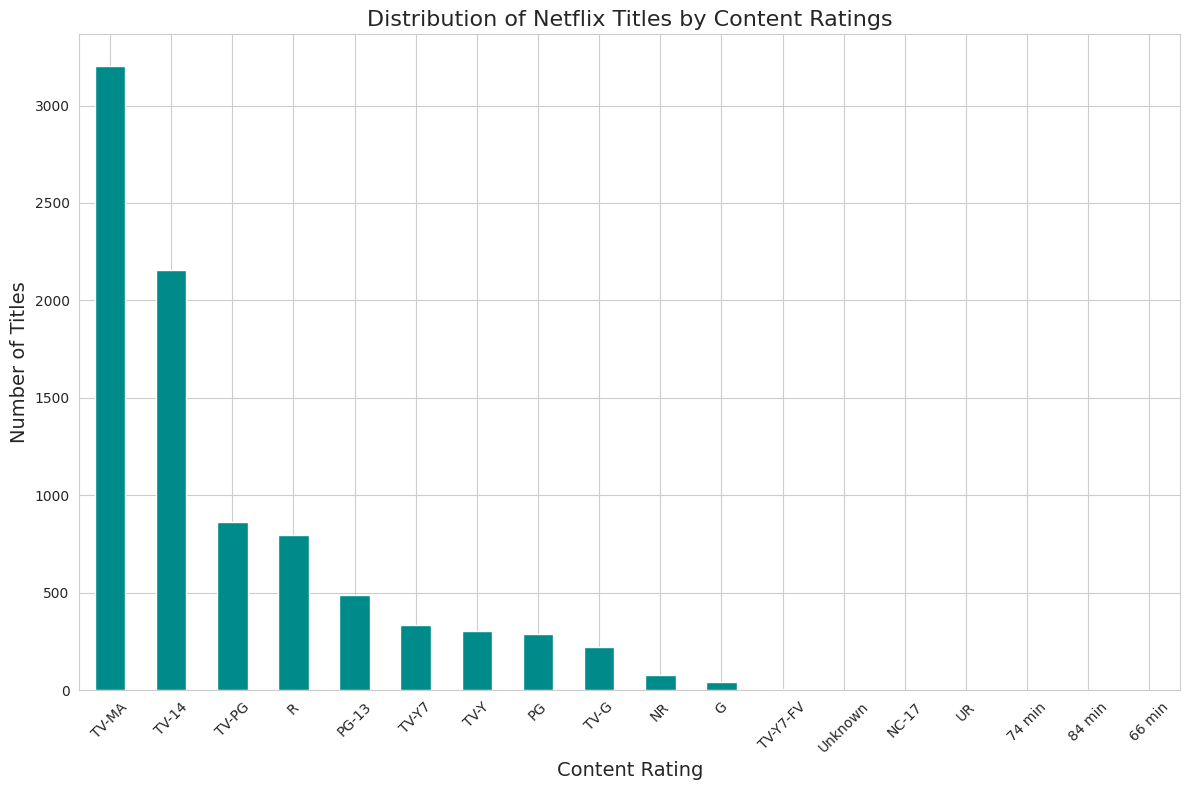

In [19]:
# Content Ratings Distribution
ratings_distribution = df['rating'].value_counts()

# Plotting Content Ratings Distribution
plt.figure(figsize=(12, 8))
ratings_distribution.plot(kind='bar', color='darkcyan')
plt.title('Distribution of Netflix Titles by Content Ratings', fontsize=16)
plt.xlabel('Content Rating', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


### Key Findings:

- **Ratings Diversity**: Netflix has a wide variety of content ratings, making sure there's something for everyone. You'll often see ratings like TV-MA (for Mature Audiences) and TV-14 (suitable for viewers over 14), which means they've got plenty of stuff geared towards adults and older teens.

- **Family and Children’s Content**: But don't worry if you're looking for something family-friendly. Netflix has got you covered with lots of TV-PG and PG rated content. They're really dedicated to making sure there's stuff that's safe and fun for younger viewers and families to enjoy together.

- **Specialized Content**: For those who like their shows and movies with a bit more edge, Netflix also offers content with ratings like R and PG-13. So whether you're into more mature themes or action-packed adventures, there's something on Netflix for every taste.

## Conclusions:

1. **Diverse Content Library**: Netflix's collection offers something for everyone, showcasing a wide array of genres including international content, ensuring it appeals to a global audience. The platform maintains a balanced mix of movies and TV shows, particularly focusing on dramas, comedies, and documentaries.

2. **Strategic Content Addition**: Over the years, Netflix has consistently increased its content additions, strategically timing releases to coincide with peak viewer engagement. They prioritize keeping the library fresh by blending new releases with timeless classics.

3. **Influential Figures**: Certain directors and actors associated with Netflix titles wield significant influence over viewer preferences, suggesting potential for strategic partnerships or tailored content creation.

4. **Viewer Preferences**: Analysis of content ratings and duration preferences reveals a diverse range of viewer tastes, with a notable inclination towards mature content (TV-MA) and a preference for concise storytelling in both movies and TV shows.


## Business Recommendations:

1. **Enhance International Content**: Invest further in expanding international content offerings to cater to diverse global audiences, with a focus on underrepresented regions or languages to tap into new viewer segments.

2. **Leverage Seasonal Trends**: Capitalize on seasonal shifts in content consumption by timing releases to align with viewer demand, such as offering family-friendly content during holiday seasons.

3. **Strategic Collaborations**: Forge partnerships with popular directors and actors to develop original content with broad appeal, leveraging their established fan bases.

4. **Content Diversity and Freshness**: Maintain a diverse content library that strikes a balance between new releases and timeless classics across various ratings, ensuring continuous refreshment to keep audiences engaged.

5. **Data-Driven Content Development**: Utilize data analytics to monitor viewer preferences and adjust content strategies accordingly, staying attuned to emerging trends and demands.

6. **Viewer Engagement Strategies**: Develop personalized marketing and engagement tactics tailored to different viewer segments based on their content preferences and viewing habits, including curated recommendations and interactive experiences.

7. **Feedback Loop**: Establish a robust feedback mechanism to gather and analyze viewer input, leveraging insights to shape future content decisions and enhance the overall viewer experience.